# Mathematical background

**In this section:**
* What are isosurfaces and isolines, and what is their relationship to the gradient?

## What is a **field**?
A field is a map of a physical quantity at each point in space and time. You are probably already familiar with graphical representations of fields, via the example of weather maps showing temperature, pressure and wind velocity :

| Physical quantity      | Example notation | Type of field     |
| :---        |    :----:   |          ---: | ---: |
| Temperature | $T(x,y,z,t)$       | Scalar (magnitude only)  |
| Pressure | $p(x,y,z,t)$       | Scalar (magnitude only)  |
| Wind velocity  | $\underline{u}(x,y,z,t)$        | Vector (magnitude and direction) |

A **scalar field** can be represented using a surface plot, contour plot, or a colour/grayscale map. On weather maps the pressure is normally represented using contours (called pressure isobars) and the temperature is normally represented using a colour map. The example below shows a grayscale map of the scalar field defined by
\begin{equation}
\phi(x,y)=x\ \mathrm{sinc}(x^2+y^2),\quad -3\leq x,y \leq 3.
\end{equation}

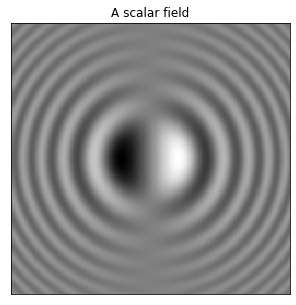

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x = np.linspace(-3., 3., 256)     #x coordinates arranged on [-3,3]
y = np.linspace(-3., 3., 256)     #y coordinates arranged on [-3,3]
X, Y = np.meshgrid(x, y)          #make the plot grid

Z = X * np.sinc(X ** 2 + Y ** 2)  #define the scalar field values at each point

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('A scalar field')
ax.axis([-3,3,-3,3])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "pcolormesh" function can be used to make a density plot.
ax.pcolormesh(X,Y,Z,shading='auto',cmap=cm.gray)
plt.show()

A **vector field** can be represented using arrows, where the length of each arrow indicates the field strength at the point. The most commonly encountered vector field quantities are velocity and force. The example below shows a plot of the vector field defined by
```{math}
:label: example_field
\underline{u}=(2x,-2y),\quad -2\leq x,y \leq 2.
```

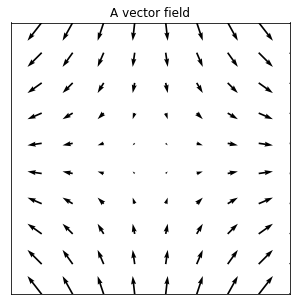

In [2]:
x=np.linspace(-2, 2, 10) #x coordinates arranged on [-2,2]
y=np.linspace(-2, 2, 10) #y coordinates arranged on [-2,2]

X,Y = np.meshgrid(x, y) #make the plot grid
(U,V)=(2*X,-2*Y)        #define the vector field values at each point

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('A vector field')
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "quiver" function is used in Python to make a vector plot. It gets its name from the apparatus that
# an archer uses to carry their arrows.
ax.quiver(X,Y,U,V)
plt.show()

If you draw curves tangent to the arrows of a vector field, these are called "field lines". The plot below shows field line for the vector field given in equation {eq}`example_field` . The field strength at each point is indicated by how close together the field lines are, assuming that the physical quantity being indicated by the field is *conserved*.

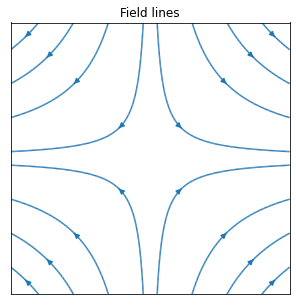

In [3]:
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('Field lines')
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#----------------------------------
start=[ #start points of selected field lines
    [-1.6,-2],[-1.1,-2],[-0.6,-2],[-0.1,-2],
    [+1.6,-2],[+1.1,-2],[+0.6,-2],[+0.1,-2],
    [-1.6,+2],[-1.1,+2],[-0.6,+2],[-0.1,+2],
    [+1.6,+2],[+1.1,+2],[+0.6,+2],[+0.1,+2]]
#----------------------------------

ax.streamplot(X,Y,U,V,start_points=start,density=10) # stream plot

plt.show()

In the case where the field represents velocity of a fluid, the field lines are known as "streamlines". In the next chapter we will discuss the difference between *streamlines*, *streaklines* and *particle paths*,for the case where the fluid velocity is a time-dependent field $\underline{u}(\underline{x},t)$.

````{exercise}
:label: streamlinesq
Choosing a plot range that you think is suitable, produce both a vector plot and a streamline plot of the velocity field $\underline{u}=(2 y, 2 x,0)$. Describe the shape of the streamlines in words.
````

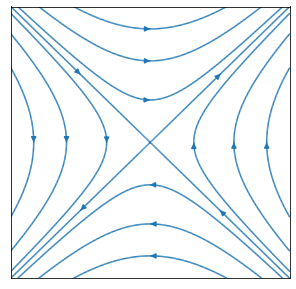

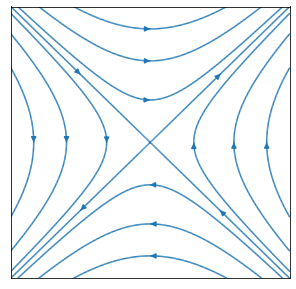

In [4]:
from myst_nb import glue
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x=np.linspace(-2, 2, 10) #x coordinates arranged on [-2,2]
y=np.linspace(-2, 2, 10) #y coordinates arranged on [-2,2]

X,Y = np.meshgrid(x, y) #make the plot grid
(U,V)=(2*Y,2*X)        #define the vector field values at each point

fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#----------------------------------
start=[ #start points of selected field lines
    [-2,-2],[-2,2],[2,-2],[2,2],
    [-1.9,2],[-1.6,2],[-1.1,2],
    [-1.9,-2],[-1.6,-2],[-1.1,-2],
    [-2,-1.9],[-2,-1.6],[-2,-1.1],
    [2,-1.9],[2,-1.6],[2,-1.1]
    ]
#----------------------------------

ax.streamplot(X,Y,U,V,start_points=start,density=10) # stream plot
glue("saddle_fig", fig, display=False)

````{toggle}

```python
x=np.linspace(-2, 2, 10) #x coordinates arranged on [-2,2]
y=np.linspace(-2, 2, 10) #y coordinates arranged on [-2,2]

X,Y = np.meshgrid(x, y) #make the plot grid
(U,V)=(2*Y,2*X)         #define the vector field values at each point

fig,ax=plt.subplots()
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#----------------------------------
start=[ #start points of selected field lines
    [-2,-2],[-2,2],[2,-2],[2,2],
    [-1.9,2],[-1.6,2],[-1.1,2],
    [-1.9,-2],[-1.6,-2],[-1.1,-2],
    [-2,-1.9],[-2,-1.6],[-2,-1.1],
    [2,-1.9],[2,-1.6],[2,-1.1]
    ]
#----------------------------------

ax.streamplot(X,Y,U,V,start_points=start,density=10) # stream plot

plt.show()
```

```{glue:} saddle_fig
```

The streamlines are in the shape of a saddle point centred at the origin.
````

## What is a **level set**

A level set of a scalar function $\phi$ is defined by the following relationship, where $c$ is a constant:

\begin{equation}\phi=c\end{equation}

The main types of level set are surfaces and curves, as outlined below.

**Level surfaces**  
The level sets of $\phi(x,y,z)$ are generally surfaces, called *isosurfaces*. As an example, consider the pressure $p(x,y,z)$ in a volume of water, exposed to atmospheric pressure $p_0$ at the free surface. In this case, the boundary between the water and the air is an isosurface, defined by $p(x,y,z)=p_0$. Choosing other values of the constant $c>p_0$ will define other pressure isosurfaces within the body of water.  

The image below shows four isosurfaces (including the free surface) during the early stages of evolution of a tsunami. The image was [obtained](https://www.researchgate.net/publication/228327330_Marching_Correctors_--_Fast_and_Precise_Polygonal_Isosurfaces_of_SPH_Data) by computational fluid dynmaic (CFD) simulation by researchers are ETH Zurich.

<br>

```{image} navstok_img/tsunami-iso.ppm
---
name: tsunami_isosurfaces
alt: alternative text
align: center
scale: 80%
---
```
<br>


**Level curves**  
The level sets of $\phi(x,y)$ are generally curves, called *isolines*, isobars or contours. On a relief/elevation map the contours indicate the height of the topographic surface (e.g. hills). On a weather map isobars show the constant pressure boundaries over the topographic surface, as illustrated by the example below from the [UK meteorological office](https://www.metoffice.gov.uk/weather/maps-and-charts/surface-pressure).

<br>

```{image} navstok_img/metweather.gif
---
name: metweather
alt: alternative text
align: center
scale: 80%
---
```
<br>

(dir-deriv)=
## The directional derivative

According to the multivariate chain rule for a scalar function $\phi(\underline{x})$, where $\underline{x}=(x(s),y(s),z(s))$,

\begin{equation}\frac{\mathrm{d}\phi}{\mathrm{d}s} =\frac{\partial \phi}{\partial x}\frac{\mathrm{d}x}{\mathrm{d}s}+\frac{\partial \phi}{\partial y}\frac{\mathrm{d}y}{{\mathrm{d}s}}+\frac{\partial \phi}{\partial z}\frac{\mathrm{d}z}{\mathrm{d}s}\end{equation}

Using vectors, we can write this result as a scalar product:

```{math}
:label: mvarchain
\frac{\mathrm{d}\phi}{\mathrm{d}s} = (\nabla\phi).\underline{u}, \qquad \underline{u}=\left(\frac{\mathrm{d}x}{\mathrm{d}s},\frac{\mathrm{d}y}{\mathrm{d}s},\frac{\mathrm{d}z}{\mathrm{d}s}\right),
```

where the gradient $\nabla\phi$ is given by

```{math}
:label: gradient
\nabla\phi = \left(\frac{\partial\phi}{\partial x},\frac{\partial\phi}{\partial y},\frac{\partial\phi}{\partial z}\right).
```

Formula {eq}`mvarchain` looks strikingly similar to the one-dimensional chain rule, with the factor $\nabla\phi$ capturing variations in $\phi$ due to $\underline{x}$ and the second factor $\underline{u}$ capturing variations in $\underline{x}$ due to $s$.  

If we evaluate $\nabla\phi$ at a given point $\underline{x}_0$, the multivariate chain rule gives us the rate of change of $\phi$ in direction $\underline{u}$ at the point. Since the parameterisation $\underline{x}(s)$ is arbitrary, we can choose a direction that we are interested in. This result is called the *directional derivative*. It is usually assumed that $\underline{u}$ is a unit vector, so the result may be denoted as follows:

\begin{equation}D_{\hat{\underline{u}}}(\phi)=(\nabla\phi).\hat{\underline{u}}\end{equation}.

Notice that the result is simply the projection of the gradient vector onto the direction that we are intested in. The gradient vector characterises the local rates of change parallel to each axis.

```{exercise}
:label: ex-dir_deriv

Find the gradient of the function $\phi(x,y,z)=xyz$ at the point $\underline{x}_0:(-2,3,4)$.

What is the directional derivative of this function in the direction $\hat{\underline{u}}=\frac{1}{13}(3,-4,12)$?
```

```{toggle}
$\nabla\phi\biggr|_{\underline{x}_0}=(yz,xz,xy)\biggr|_{\underline{x}_0}=(12,-8,-6)$

$D_{\underline{u}}\phi\biggr|_{\underline{x}_0}=\frac{1}{13}(3,-4,12).(12,-8,-6)=-\frac{68}{13}$
```

## The gradient direction

**The gradient is perpendicular to the level sets**  
Since level sets are defined by the relationship $\phi=c$, differentiation gives $\frac{\mathrm{d}\phi}{\mathrm{d}s}=0$. Using the result {eq}`mvarchain`, we find that on a level set

\begin{equation}(\nabla\phi).\hat{\underline{u}}=0, \qquad \underline{u}=\left(\frac{\mathrm{d}x}{\mathrm{d}s},\frac{\mathrm{d}y}{\mathrm{d}s},\frac{\mathrm{d}z}{\mathrm{d}s}\right)\end{equation}

Since $\hat{\underline{u}}$ is parallel to the level sets of $\phi$, the result result tells us that $\nabla\phi$ is perpendicular to the level sets of $\phi$.  


**The gradient points "uphill"**  
From the definition of the scalar product, we know that

\begin{equation}\biggr|D_{\hat{\underline{u}}}(\phi)\biggr| = \biggr|\nabla \phi\biggr|\cos(\theta)\end{equation}

where $\theta$ is the angle between $\nabla \phi$ and the direction vector $\hat{\underline{u}}$.

The result is largest when $\theta=0$. Therefore, $\nabla \phi$ points in the direction of maximum increase of the function $\phi$ and has magnitude equal to the rate of maximum increase.  

````{exercise}
:label: pot-fun
Some velocity fields, called *potential fields*, may be defined as the gradient of a scalar potential $\phi(x,y,z)$. For example, the gravitational field $\underline{g}=(0,0,-g)$ can be made to satisfy $\underline{g}=\nabla\phi$ by taking $\phi=-gz$.

Consider a two-dimensional velocity field $\underline{u}=(u,v)$, which is defined by a potential function
```{math}
\phi=x e^{-x^2-y^2}.
```
* Produce a vector plot of this field on the range $-2\leq x,y \leq 2$.
* On the same plot, illustrate some of the contours of the scalar potential.
* In which direction are the contours of $\phi$, relative to $\underline{u}$ ?

The function needed to plot contours is part of the matplotlib library. Usage guidelines can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).
````

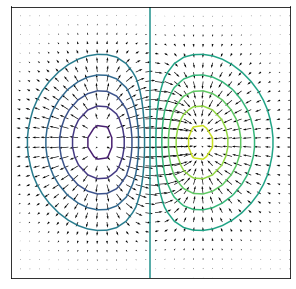

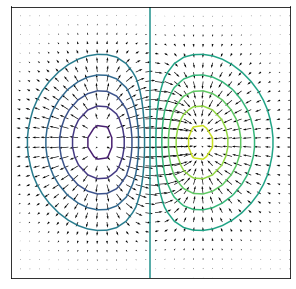

In [5]:
x=np.linspace(-2, 2, 30)
y=np.linspace(-2, 2, 30)

X,Y = np.meshgrid(x, y)  
(U,V)=(1-2*X**2,-2*X*Y)*np.exp(-X**2-Y**2)

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.quiver(X,Y,U,V)

ax.contour(X,Y,X*np.exp(-X**2-Y**2),levels=10)

glue("contour_fig", fig, display=False)

````{toggle}

```python
x=np.linspace(-2, 2, 30)
y=np.linspace(-2, 2, 30)

X,Y = np.meshgrid(x, y)  
(U,V)=(1-2*X**2,-2*X*Y)*np.exp(-X**2-Y**2)

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.quiver(X,Y,U,V)

ax.contour(X,Y,X*np.exp(-X**2-Y**2),levels=10)

plt.show()
```

```{glue:} contour_fig
```

The contours of the scalar function are perpendicular to the vector field.
````